In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("churn_data_te.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [4]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
data.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [6]:
data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [22]:
# Detect object columns (categorical)
categorical_cols = data.select_dtypes(include='object').columns
print("Columns that need encoding:", categorical_cols.tolist())


Columns that need encoding: []


In [23]:
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [24]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8653980582524272


In [29]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[5929  864]
 [ 869 5213]]


In [30]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      6793
           1       0.86      0.86      0.86      6082

    accuracy                           0.87     12875
   macro avg       0.86      0.86      0.86     12875
weighted avg       0.87      0.87      0.87     12875



In [31]:
import seaborn as sns

In [32]:
sns.set(style="whitegrid")

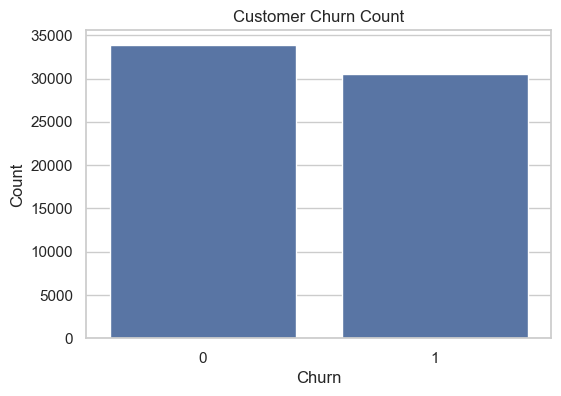

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Churn')
plt.title('Customer Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

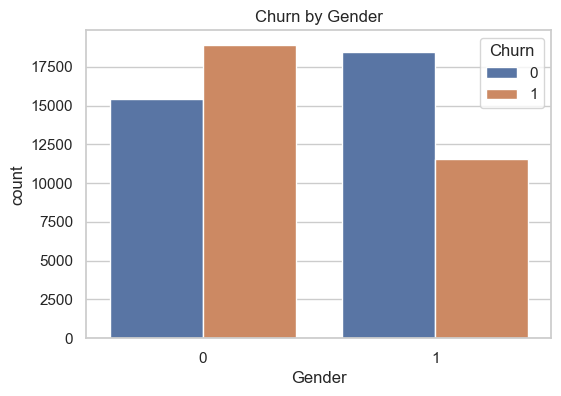

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()

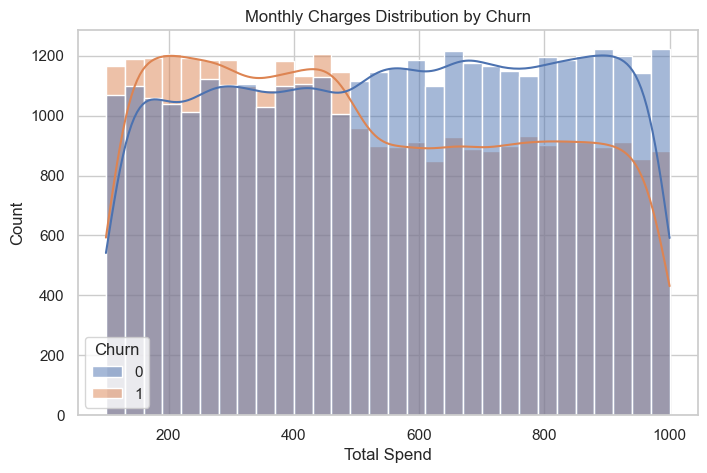

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Total Spend', hue='Churn', kde=True, bins=30)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

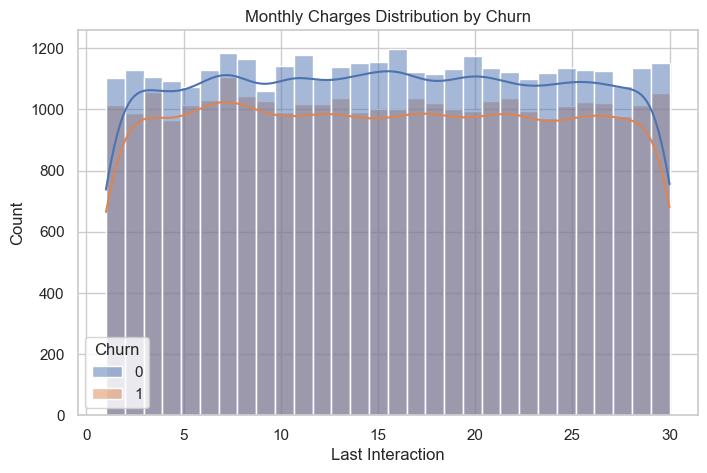

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Last Interaction', hue='Churn', kde=True, bins=30)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

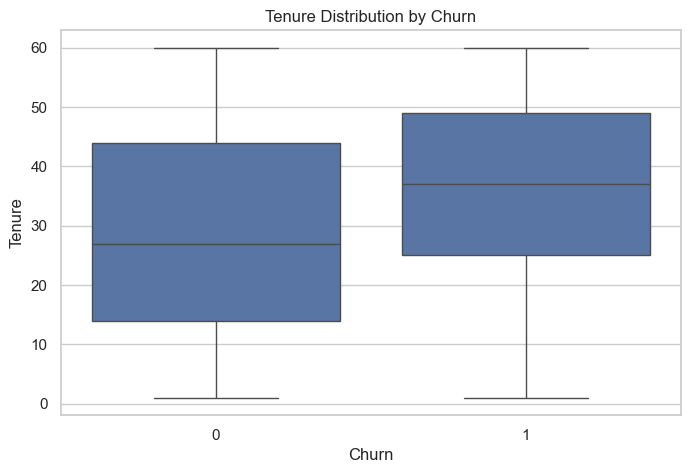

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Churn', y='Tenure')
plt.title('Tenure Distribution by Churn')
plt.show()

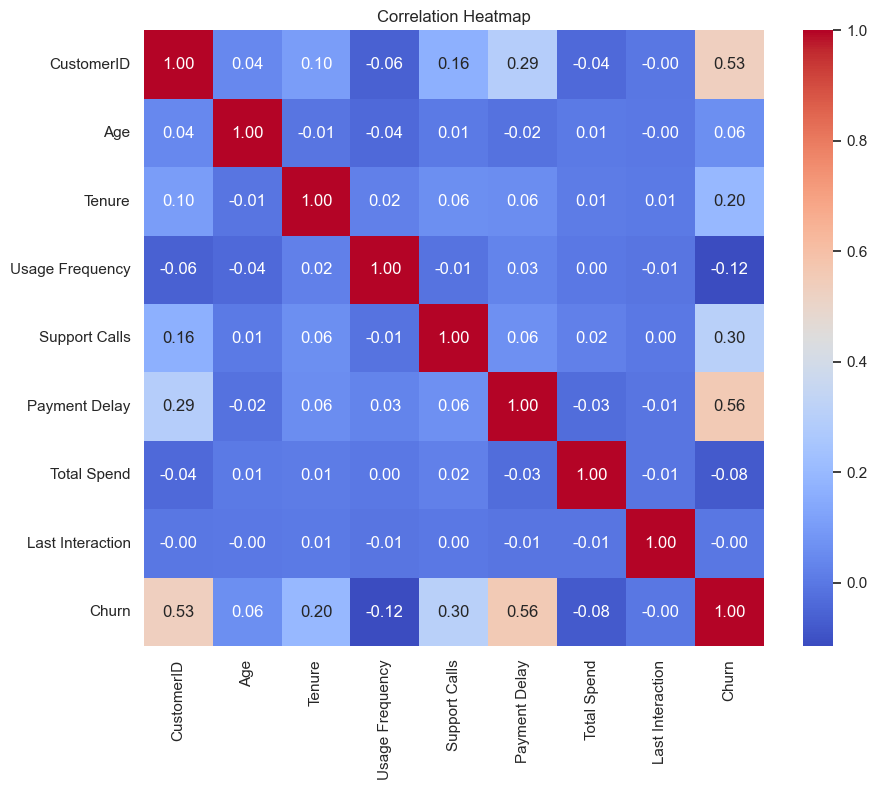

In [24]:
plt.figure(figsize=(10, 8))
corr = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

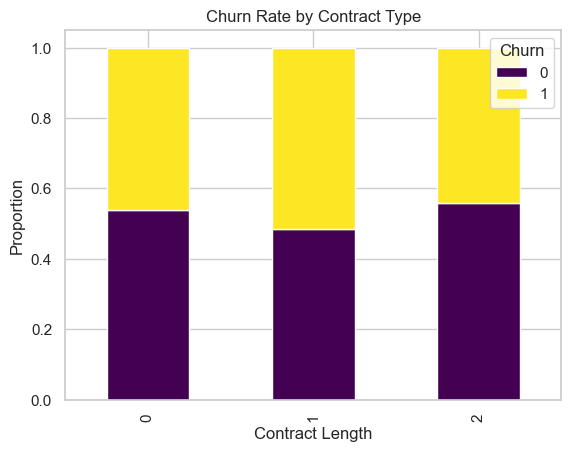

In [25]:
contract_churn = pd.crosstab(data['Contract Length'], data['Churn'], normalize='index')
contract_churn.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion')
plt.show()

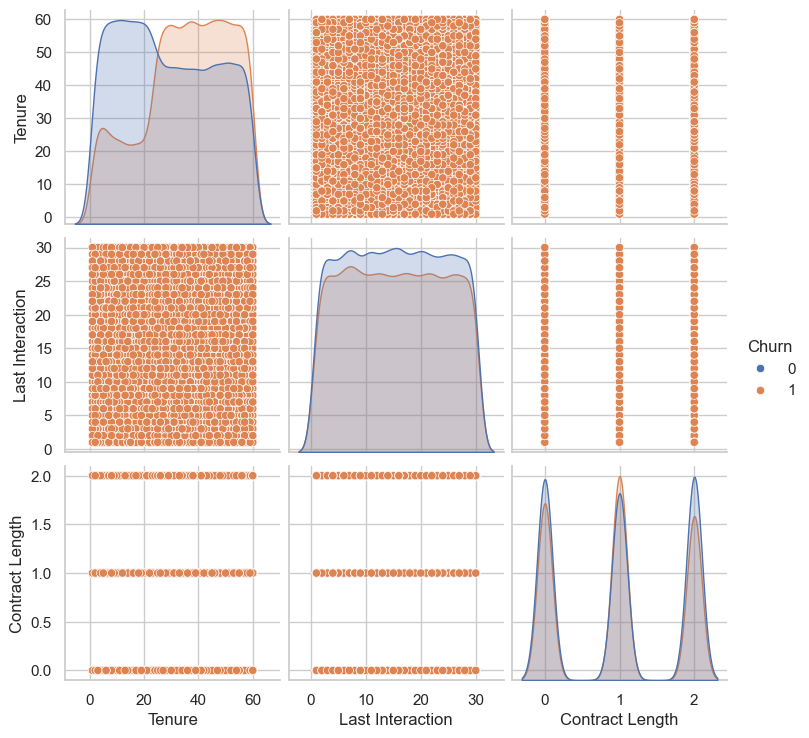

In [26]:
sns.pairplot(data[['Tenure', 'Last Interaction', 'Contract Length', 'Churn']], hue='Churn', diag_kind='kde')
plt.show()


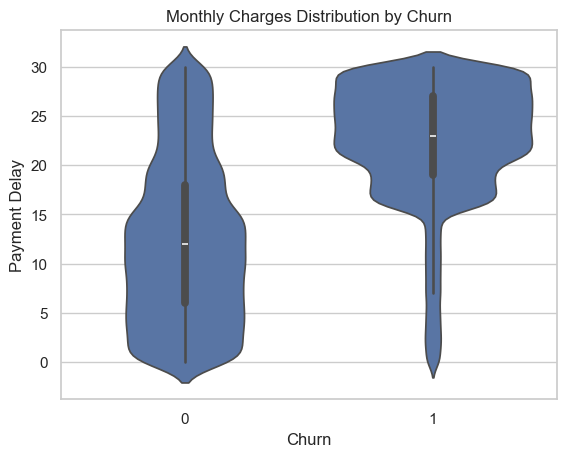

In [27]:
sns.violinplot(x='Churn', y='Payment Delay', data=data)
plt.title('Monthly Charges Distribution by Churn')
plt.show()


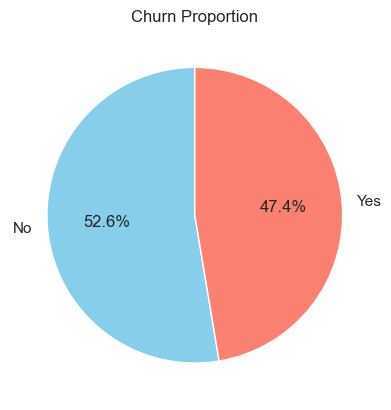

In [28]:
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No', 'Yes'], colors=['skyblue', 'salmon'])
plt.title('Churn Proportion')
plt.ylabel('')
plt.show()


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [34]:
data.dropna(inplace=True)
X = data.drop('Churn', axis=1)
y = data['Churn']

In [35]:
X = pd.get_dummies(X, drop_first=True)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9979029126213592


In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[6793    0]
 [  27 6055]]


In [42]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [44]:
X = data.drop("Churn", axis=1)
y = data["Churn"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
svm_model = SVC()


In [50]:
knn_model = KNeighborsClassifier()


In [51]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)

In [53]:
svm_model.fit(X_train_scaled, y_train)

SVC()

In [54]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [52]:


xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [55]:
svm_preds = svm_model.predict(X_test_scaled)
knn_preds = knn_model.predict(X_test_scaled)
xgb_preds = xgb_model.predict(X_test)

In [56]:
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("SVM Report:\n", classification_report(y_test, svm_preds))

SVM Accuracy: 0.958368932038835
SVM Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      6793
           1       0.96      0.95      0.96      6082

    accuracy                           0.96     12875
   macro avg       0.96      0.96      0.96     12875
weighted avg       0.96      0.96      0.96     12875



In [57]:
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print("KNN Report:\n", classification_report(y_test, knn_preds))

KNN Accuracy: 0.930873786407767
KNN Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      6793
           1       0.93      0.93      0.93      6082

    accuracy                           0.93     12875
   macro avg       0.93      0.93      0.93     12875
weighted avg       0.93      0.93      0.93     12875



In [58]:
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("XGBoost Report:\n", classification_report(y_test, xgb_preds))

XGBoost Accuracy: 0.9999223300970874
XGBoost Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875

